# Dec ??th, 2022 (SLC: Saba plot)

**Motivation**: make a self contained notebook for Saba to plot stuff <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [3]:
path = '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3'
lookup = np.load(pjoin(path, 'roi_lookup.npy'), allow_pickle=True).item()

In [6]:
path = '/home/hadi/Downloads/ca_average'
x = np.load(pjoin(path, 'sub_SLC06ca_rest.npy'))

In [8]:
x.shape

(540, 110)

In [9]:
len(lookup['ca2'])

540

In [11]:
mice = Mice(512)

In [12]:
bs = Base(mice, mode='ca2')

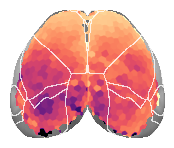

In [38]:
_ = bs.show(x[:, 20], vmin=-100, vmax=0)

<AxesSubplot:ylabel='Count'>

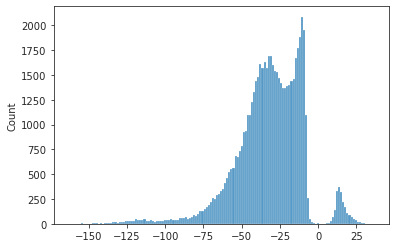

In [33]:
sns.histplot(x.ravel())

## Project

In [77]:
proj = bs.project_vec(x.T, layer=0, add_disjoint=False)
list(proj), proj['top'].shape

(['top', 'flat'], (110, 1320, 1140))

<matplotlib.image.AxesImage object at 0x7fbe633bc100>

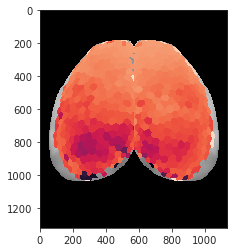

In [81]:
plt.imshow(top, cmap='Greys_r')
plt.imshow(mwh(mask_topview == 0, proj['top'][40]))

In [75]:
parcel_top, parcel_flat = mice.parcel.load_top_flat()
regions = [mice.parcel.encode(r) for r in lookup['ca2'].values()]
mask_topview = np.isin(parcel_top, regions)
np.save('topview_mask.npy', mask_topview)

In [76]:
top, flat = bs.load_top_flat()
np.save('topview.npy', top)

## Do one BOLD example

In [84]:
path = '/home/hadi/Downloads/bold average'
x = np.load(pjoin(path, 'sub_SLC08_bold_rest.npy'))
x.shape

(3068, 11)

In [87]:
subset_idxs = mice.get_subset_idxs('surface')
len(subset_idxs)

540

In [88]:
x = x[subset_idxs]
x.shape

(540, 11)

In [89]:
proj = bs.project_vec(x.T, layer=0, add_disjoint=False)
list(proj), proj['top'].shape

(['top', 'flat'], (11, 1320, 1140))

<matplotlib.image.AxesImage object at 0x7fbd36571760>

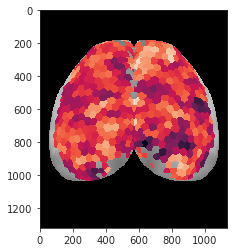

In [98]:
plt.imshow(top, cmap='Greys_r')
plt.imshow(mwh(mask_topview == 0, proj['top'][6]))